In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('termdeposit_test.csv.crdownload')

In [4]:
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [5]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [6]:
df.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success
13563,34839,29,admin.,married,secondary,no,2,yes,no,cellular,6,may,339,1,362,1,failure


In [7]:
df.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [8]:
#we observe that there is no nullvalues present in the dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [10]:
#we observe that no value is missing in the datset and has 8 columns of int type and 9 columns of object type

In [11]:
df.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [12]:
df.duplicated().sum()

0

In [13]:
#No duplicate rows are present in dataset

In [14]:
#seperating categorical and numerical columns

In [15]:
num=[]
cat=[]
for i in df:
    if df[i].dtypes=='object':
        cat.append(i)
    else:
        num.append(i)

In [16]:
print(num)
print(cat)

['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [17]:
for i in df[cat]:
    print(i,"=",df[i].nunique)
    

job = <bound method IndexOpsMixin.nunique of 0             services
1              retired
2        self-employed
3             services
4          blue-collar
             ...      
13559       management
13560      blue-collar
13561          retired
13562           admin.
13563           admin.
Name: job, Length: 13564, dtype: object>
marital = <bound method IndexOpsMixin.nunique of 0         married
1        divorced
2          single
3          single
4        divorced
           ...   
13559     married
13560     married
13561     married
13562      single
13563     married
Name: marital, Length: 13564, dtype: object>
education = <bound method IndexOpsMixin.nunique of 0        secondary
1          primary
2         tertiary
3          primary
4        secondary
           ...    
13559     tertiary
13560      primary
13561      primary
13562    secondary
13563    secondary
Name: education, Length: 13564, dtype: object>
default = <bound method IndexOpsMixin.nunique of 0        no
1

In [18]:
#from above we observe that number of unique values present in each column


In [19]:
for j in df[cat]:
    print(j,  df[j].value_counts())

job blue-collar      2890
management       2819
technician       2290
admin.           1540
services         1251
retired           690
entrepreneur      479
self-employed     456
unemployed        398
housemaid         366
student           303
unknown            82
Name: job, dtype: int64
marital married     8119
single      3868
divorced    1577
Name: marital, dtype: int64
education secondary    6978
tertiary     4000
primary      2043
unknown       543
Name: education, dtype: int64
default no     13334
yes      230
Name: default, dtype: int64
housing yes    7546
no     6018
Name: housing, dtype: int64
loan no     11451
yes     2113
Name: loan, dtype: int64
contact cellular     8862
unknown      3843
telephone     859
Name: contact, dtype: int64
month may    4097
jul    2051
aug    1914
jun    1603
nov    1187
apr     877
feb     822
jan     426
oct     226
sep     169
mar     135
dec      57
Name: month, dtype: int64
poutcome unknown    11030
failure     1539
other        552
succe

In [20]:
#From above we obsrve the no of values counts of each data present in the each column

In [21]:
df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000
mean,22704.057726,40.887128,1358.496535,15.738646,258.278679,2.759510,41.648555,0.594441
std,12994.043329,10.604108,3082.940623,8.288174,258.488648,3.060928,101.985178,1.998193
min,1.000000,18.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11546.000000,33.000000,71.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,22782.000000,39.000000,445.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33974.250000,48.000000,1413.250000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45206.000000,95.000000,98417.000000,31.000000,3253.000000,58.000000,850.000000,55.000000


In [22]:
#from above we observe that age column has mean>median which means dta is right skewed
#balance ,duration ,pdays mean<median hence data is skewed towards left
#we also observe that there is huge difference in the 75th quantile and the maximum quantile,hence presence of outliers is detected

In [23]:
##EDA---UNIVARIATE ANALYSIS

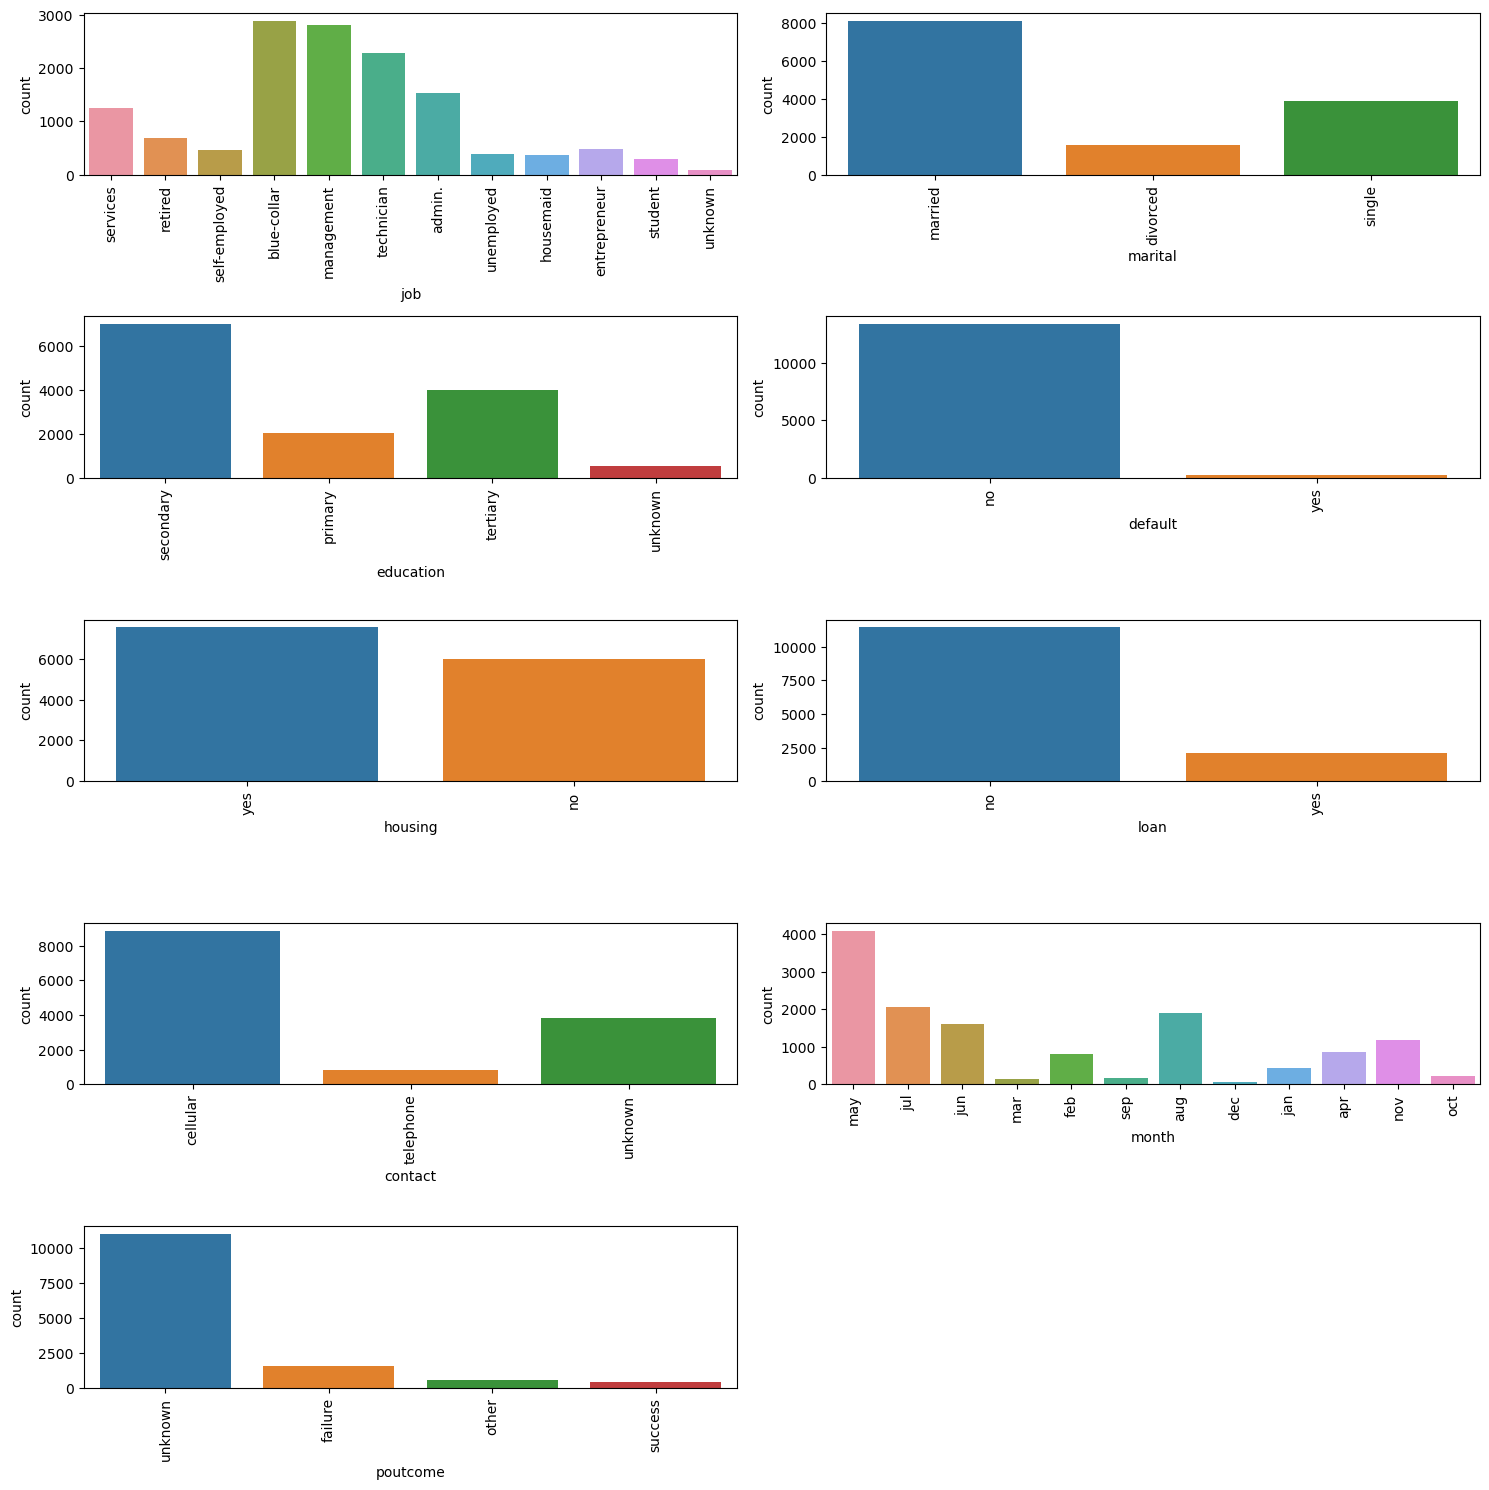

In [24]:
plt.figure(figsize=(15,15))
p=1
for c in cat:
    if p<=9:
        plt.subplot(5,2,p)
        sns.countplot(x=c,data=df)
        plt.xticks(rotation=90)
    p+=1
plt.tight_layout()

In [25]:
#from above we observe that more contact were done in the month of may 
#More contact to customers were done using cellphone than other services
#More customers have applied for housing loans
#Less customers have taken personal loan

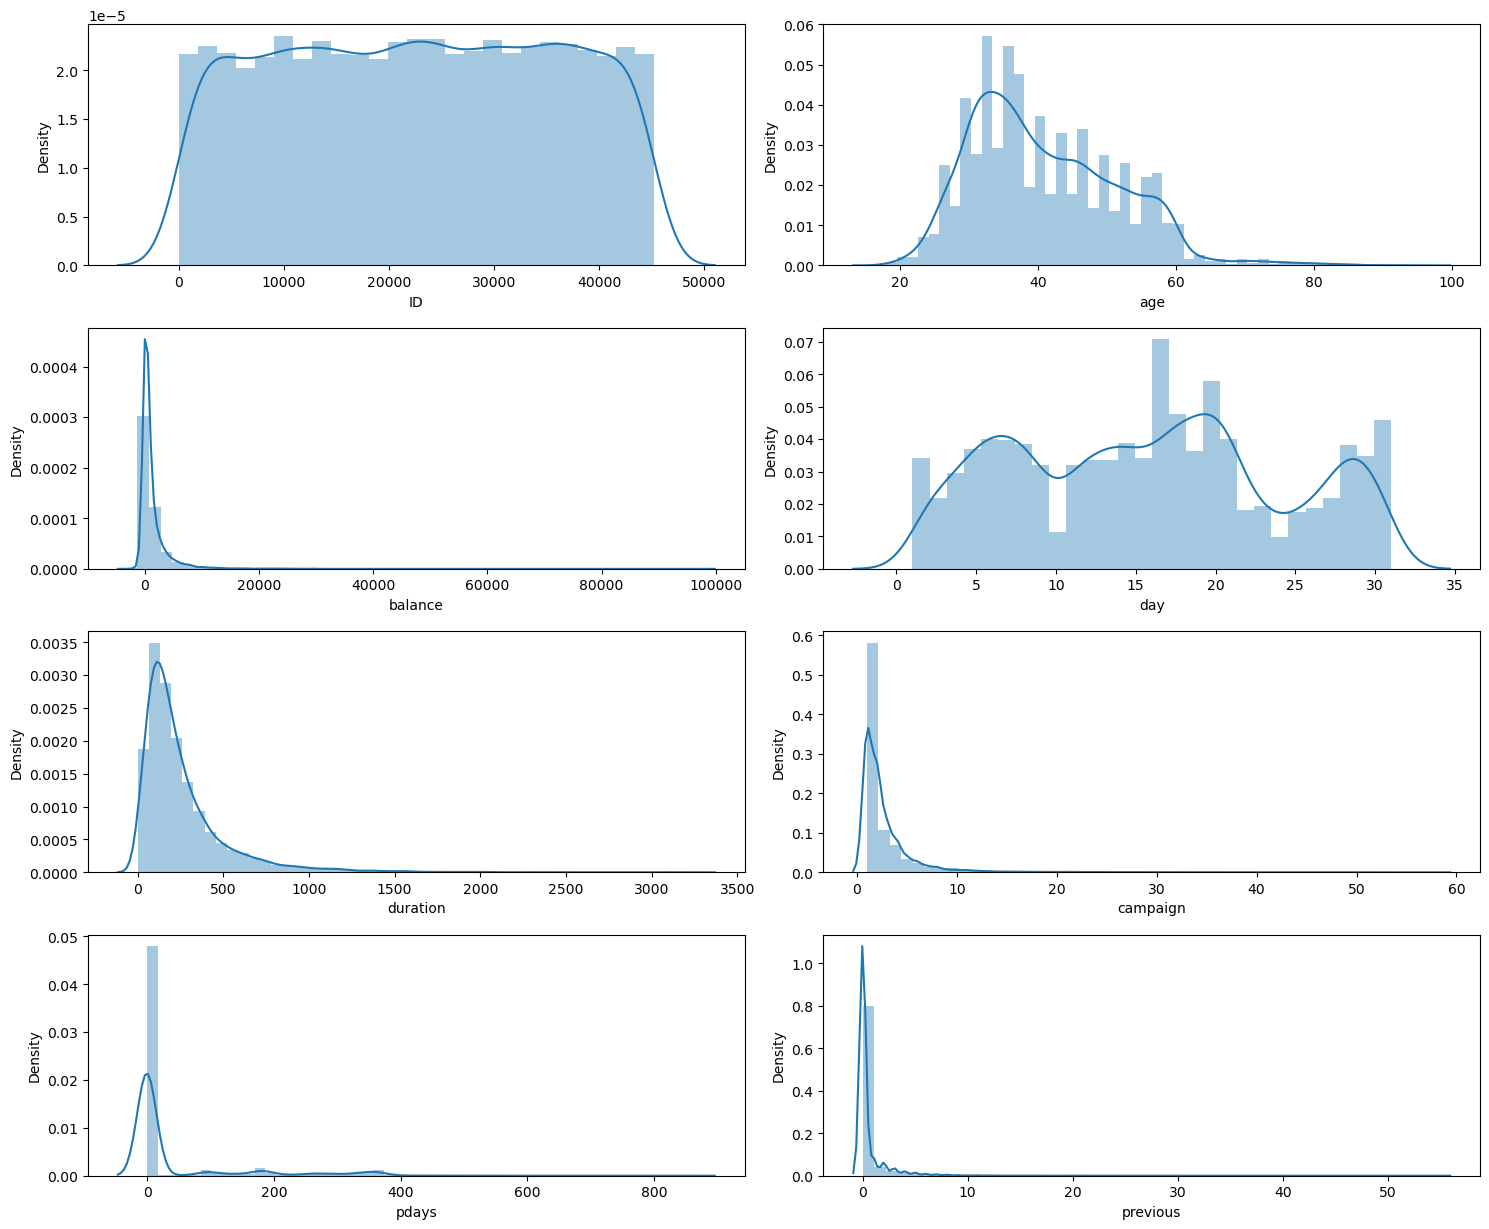

In [26]:
#Lets observe distrbution of data in numerical columns
plt.figure(figsize=(15,15))
p=1
for n in num:
    if p<=9:
        plt.subplot(5,2,p)
        sns.distplot(df[n])
        
    p+=1
plt.tight_layout()

In [27]:
#from above distplot we observe that customers have age between 20 to 40yrs who have applied for term deposit
#almost every column is right skewed as mean>median
#More calls were done  to cutomers between the days 15 to 20 of month 

In [28]:
#BIVARIATE ANALYIS

In [29]:
cat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

<Axes: xlabel='marital', ylabel='age'>

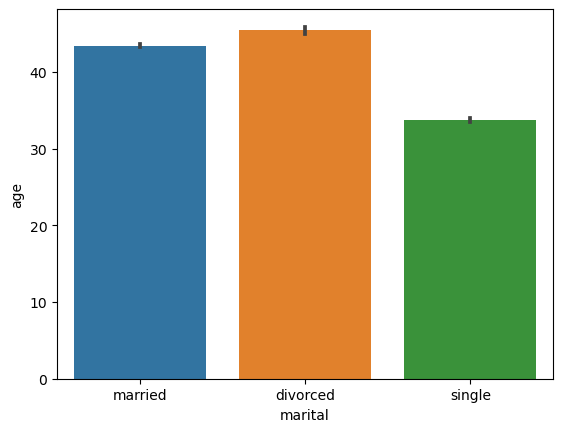

In [30]:
sns.barplot(y='age',x='marital',data=df)

In [31]:
#we notice that customer who are maried have age between 20 to 45

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'services'),
  Text(1, 0, 'retired'),
  Text(2, 0, 'self-employed'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'management'),
  Text(5, 0, 'technician'),
  Text(6, 0, 'admin.'),
  Text(7, 0, 'unemployed'),
  Text(8, 0, 'housemaid'),
  Text(9, 0, 'entrepreneur'),
  Text(10, 0, 'student'),
  Text(11, 0, 'unknown')])

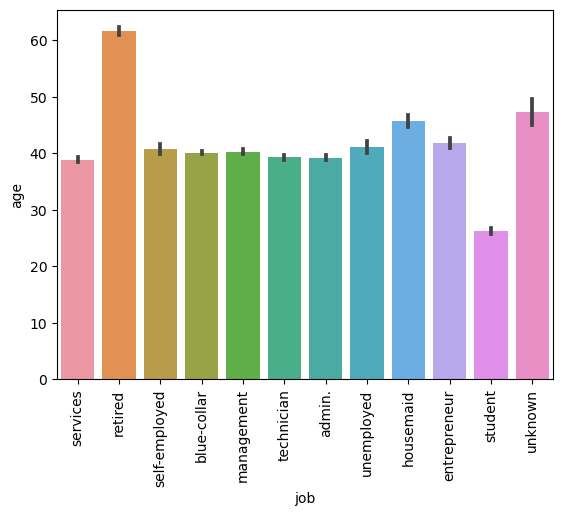

In [32]:
sns.barplot(y='age',x='job',data=df)
plt.xticks(rotation=90)

In [33]:
#The more customers are in the age range between 20 to 40

<Axes: xlabel='housing', ylabel='age'>

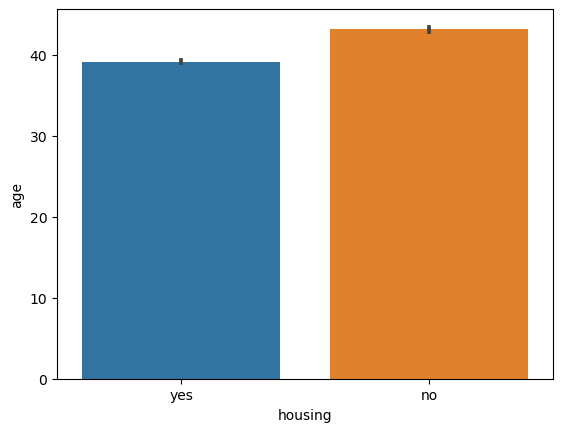

In [34]:
sns.barplot(y='age',x='housing',data=df)

In [35]:
#The customers who are between age 30 to 40 have applied for housing loan


<Axes: xlabel='loan', ylabel='age'>

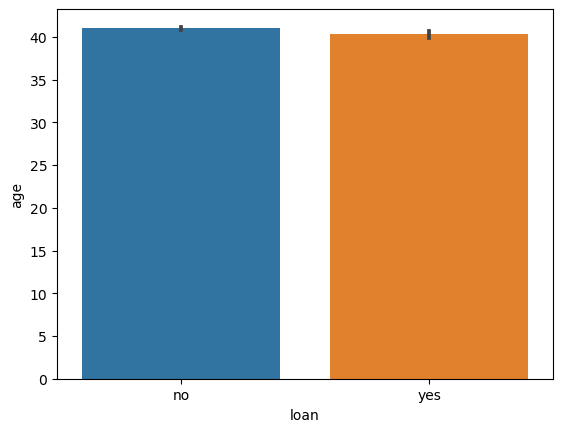

In [36]:
sns.barplot(y='age',x='loan',data=df)

In [37]:
#Almost  customers have applied for personal loan have age range beween 30 to 40

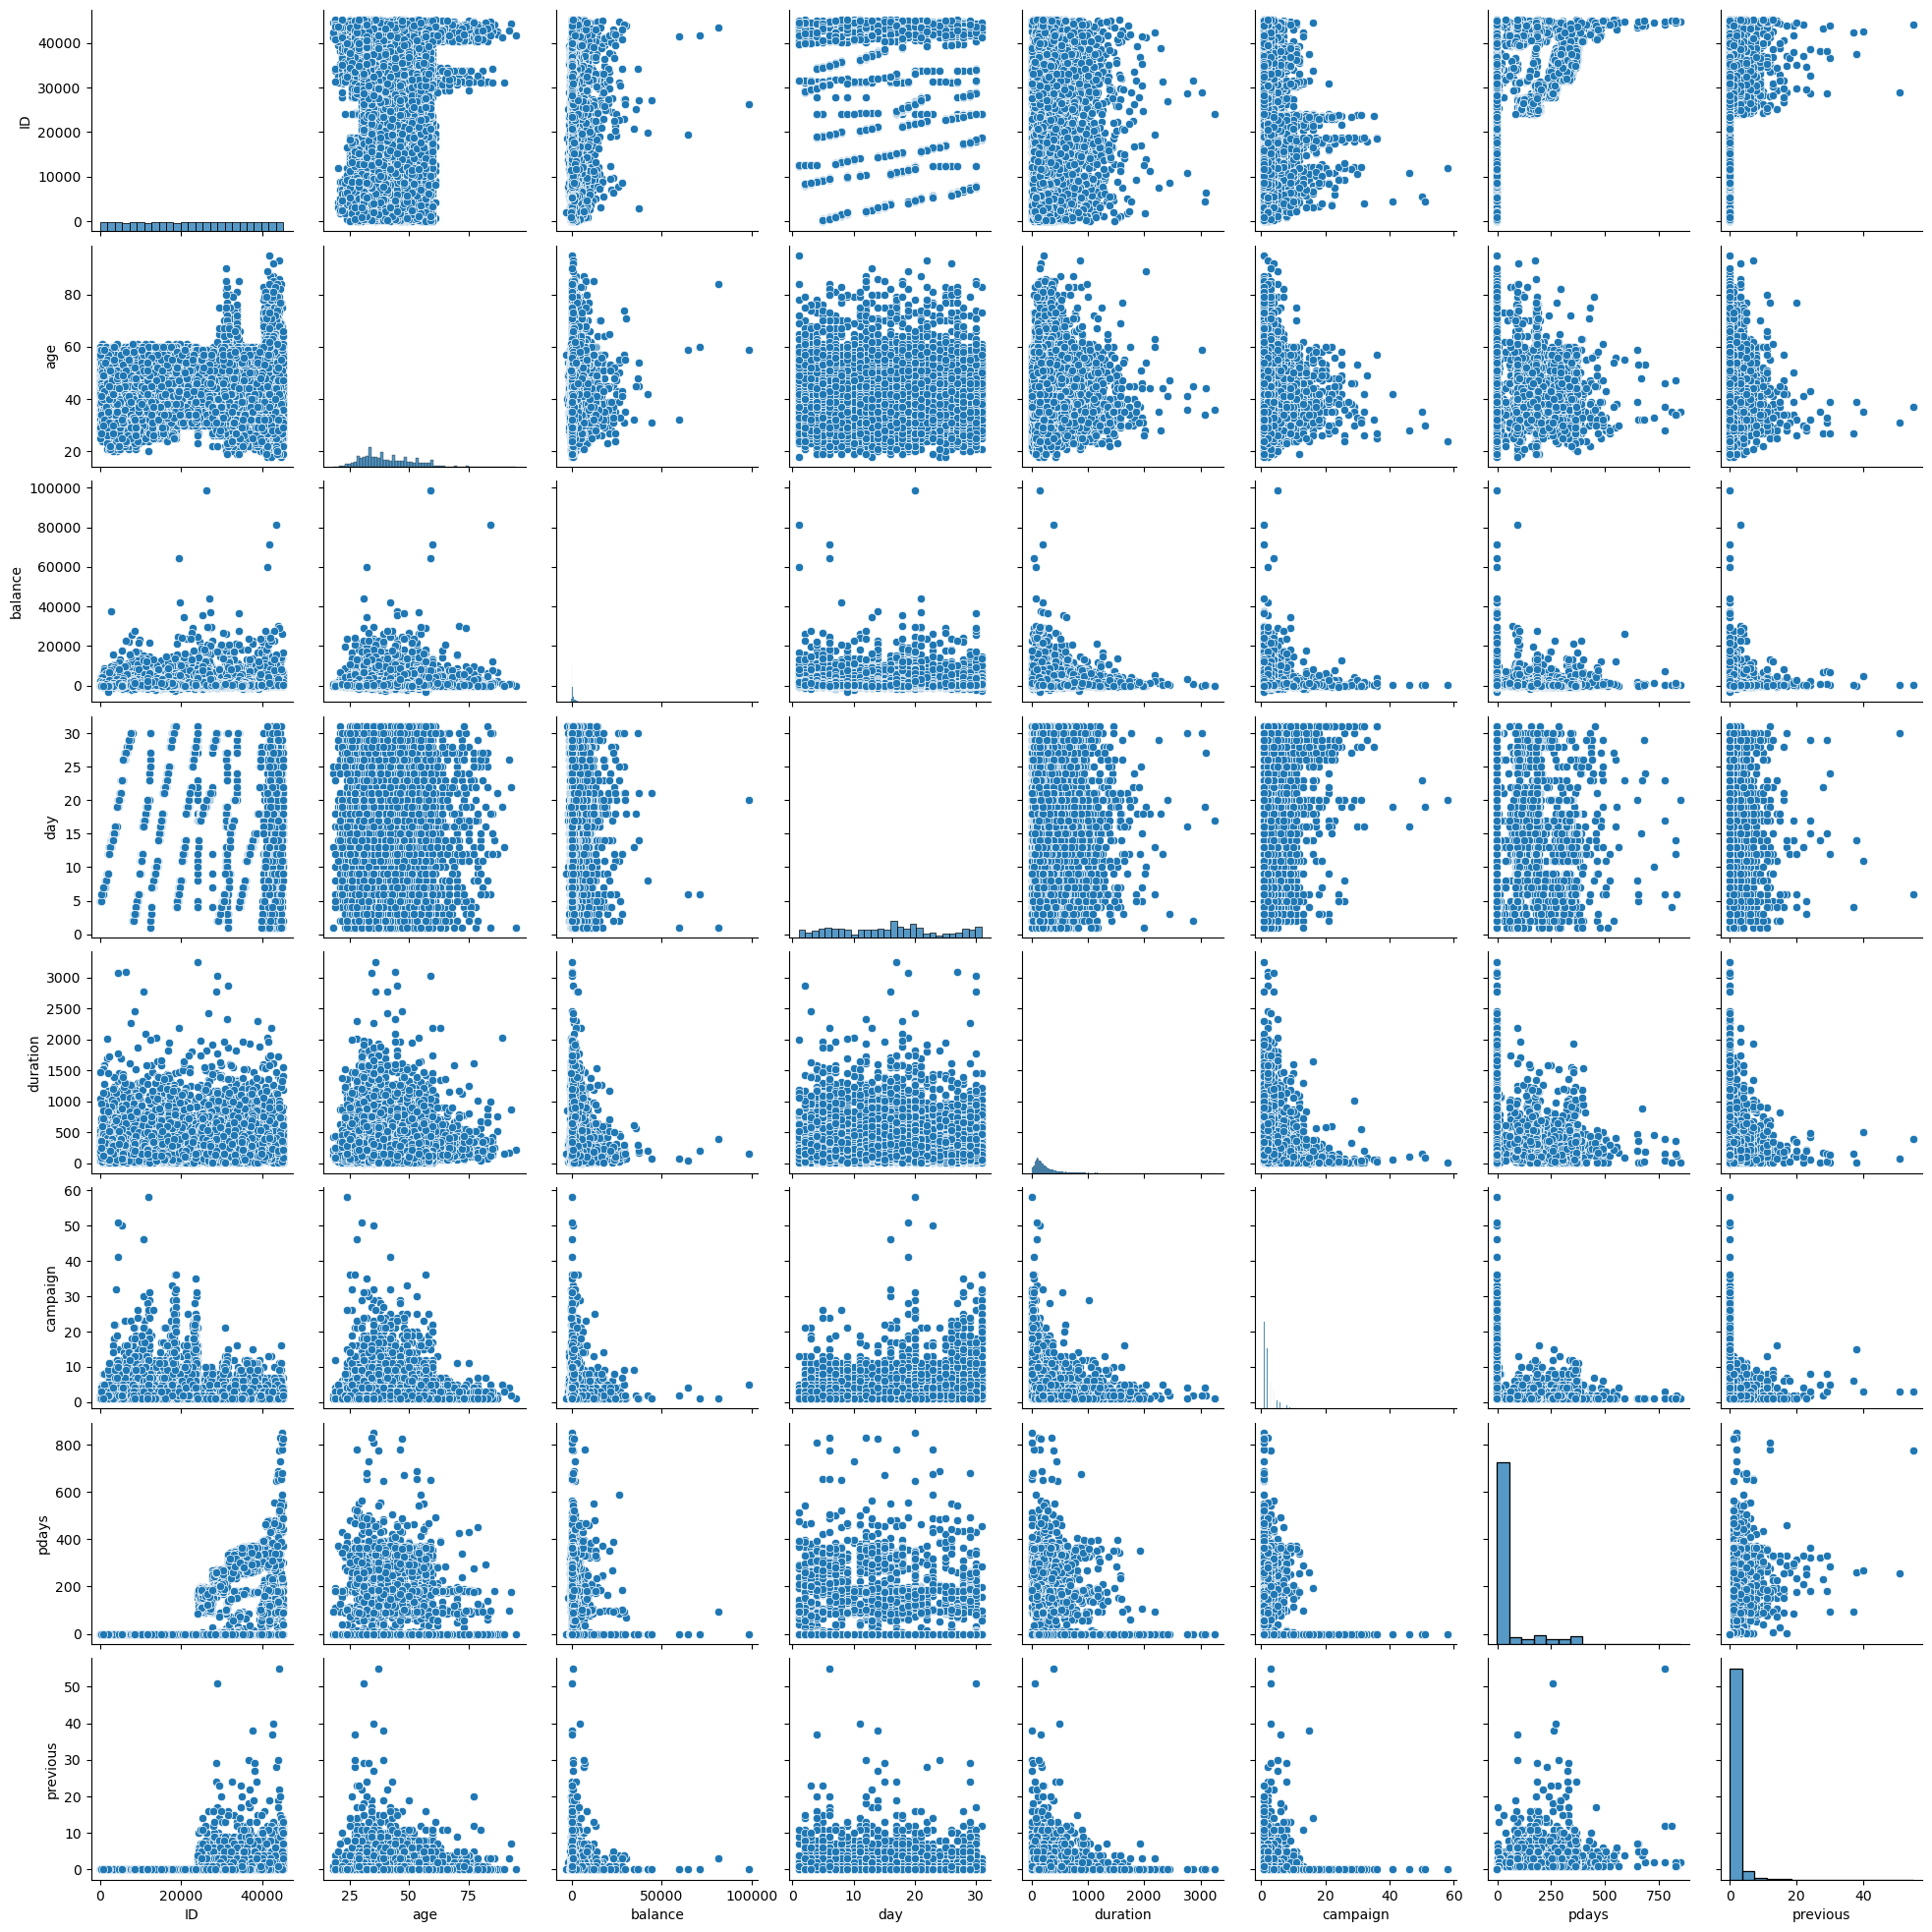

In [38]:
sns.pairplot(data=df)

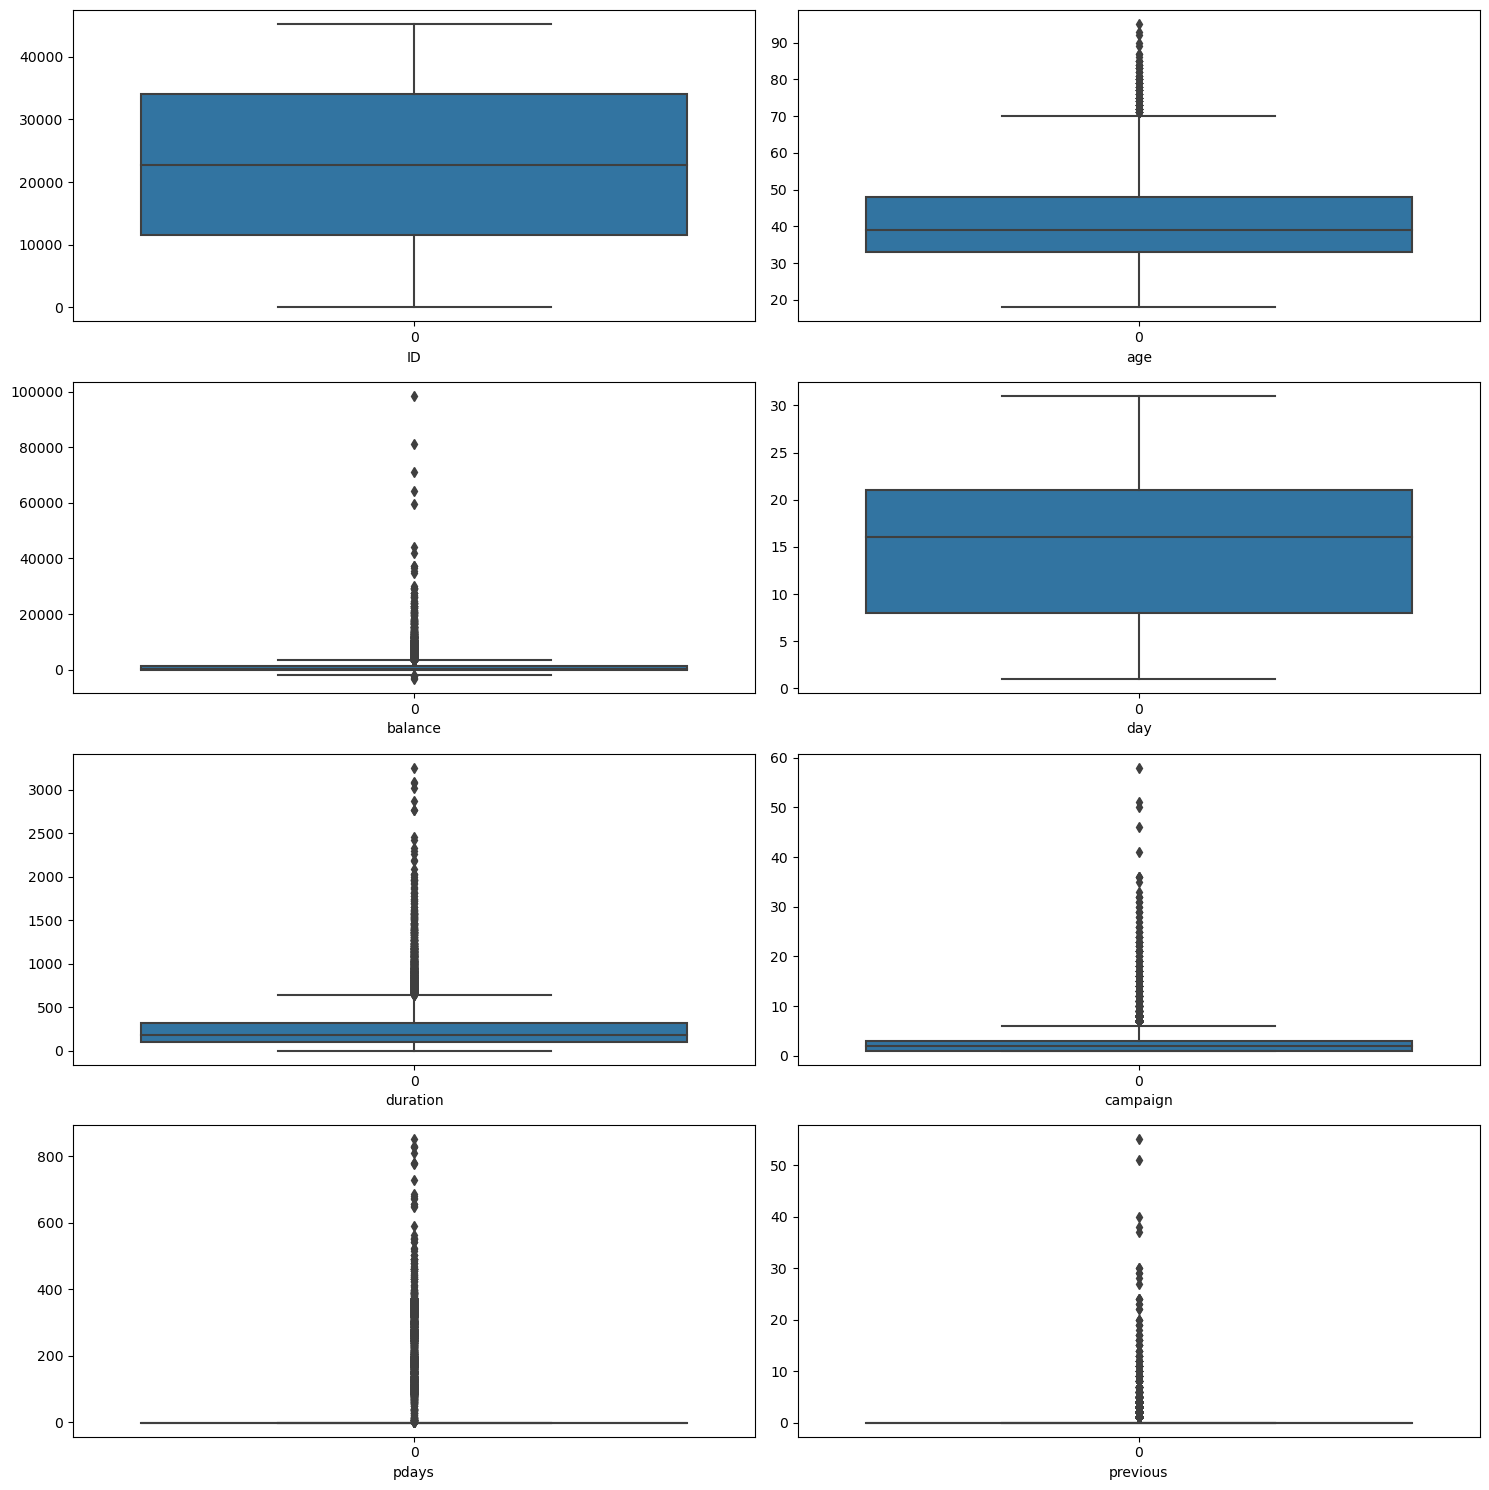

In [39]:
#Boxplot for detecting outliers'
plt.figure(figsize=(15,15))
p=1
for b in num:
    if p<=8:
        plt.subplot(4,2,p)
        sns.boxplot(df[b])
        plt.xlabel(b)
    p+=1
plt.tight_layout()

In [40]:
#We observe that there are number of outliers present in the datset
#As we observe that almost all data is been plotted as outliers lets not remove outliers otherwise whole data will be gone


In [41]:
#Checking skewness
df.skew()

ID         -0.013625
age         0.692404
balance     9.165015
day         0.106806
duration    3.017221
campaign    4.958236
pdays       2.555601
previous    8.704583
dtype: float64

In [42]:
#As previous pdays campaign columns are not much useful for prediction of subscription ,hence not removing skewness

In [43]:
#Encoding Ctegorical columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for c in df[cat]:
       df[c]=le.fit_transform(df[c].values.reshape(-1,1))
        
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,7,1,1,0,118,1,0,0,15,8,20,6,-1,0,3
1,40403,78,5,0,0,0,2787,0,0,1,1,5,372,1,-1,0,3
2,3709,31,6,2,2,0,144,1,0,2,16,8,676,1,-1,0,3
3,37422,57,7,2,0,0,3777,1,0,1,13,8,65,2,-1,0,3
4,12527,45,1,0,1,0,-705,0,1,2,3,5,111,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,4,1,2,0,45,0,0,0,28,1,148,4,-1,0,3
13560,11743,54,1,1,0,0,2281,1,0,2,20,6,158,1,-1,0,3
13561,28292,35,5,1,0,0,285,1,0,0,29,4,136,1,-1,0,3
13562,45163,29,0,2,1,0,464,0,0,0,9,9,208,2,91,3,2


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         13564 non-null  int64
 1   age        13564 non-null  int64
 2   job        13564 non-null  int32
 3   marital    13564 non-null  int32
 4   education  13564 non-null  int32
 5   default    13564 non-null  int32
 6   balance    13564 non-null  int64
 7   housing    13564 non-null  int32
 8   loan       13564 non-null  int32
 9   contact    13564 non-null  int32
 10  day        13564 non-null  int64
 11  month      13564 non-null  int32
 12  duration   13564 non-null  int64
 13  campaign   13564 non-null  int64
 14  pdays      13564 non-null  int64
 15  previous   13564 non-null  int64
 16  poutcome   13564 non-null  int32
dtypes: int32(9), int64(8)
memory usage: 1.3 MB


In [45]:
#As we notice that all columns converted to int after Encoding
#There are no missing values in the dataest

In [46]:
#as iD column holds unique iDS of clients ,not furher used for analysis hence dropping column
df.drop('ID',axis=1,inplace=True)

In [47]:
#Checking correlation 
cor=df.corr()
cor

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
age,1.000000,-0.024413,-0.396771,-0.117274,-0.022243,0.085246,-0.189573,-0.022863,0.024945,-0.004622,-0.051712,-0.006456,0.002439,-0.027797,-0.011326,0.009334
job,-0.024413,1.000000,0.052579,0.158185,-0.010780,0.012731,-0.125409,-0.018603,-0.090929,0.027381,-0.100924,0.009494,0.019584,-0.028884,0.005024,0.020020
marital,-0.396771,0.052579,1.000000,0.110982,-0.000793,-0.000986,-0.012039,-0.059223,-0.036893,0.000419,-0.014271,0.012563,-0.008048,0.017854,0.021518,-0.010196
education,-0.117274,0.158185,0.110982,1.000000,-0.020382,0.063001,-0.080032,-0.054845,-0.108417,0.033917,-0.060441,-0.002513,0.006523,0.003763,0.024317,-0.020194
default,-0.022243,-0.010780,-0.000793,-0.020382,1.000000,-0.060447,0.008097,0.066402,0.018585,0.007931,0.027885,-0.008022,0.012558,-0.030713,-0.025641,0.034386
balance,0.085246,0.012731,-0.000986,0.063001,-0.060447,1.000000,-0.071759,-0.086091,-0.034654,0.006890,0.012272,0.015375,-0.020524,0.007136,0.024824,-0.023993
housing,-0.189573,-0.125409,-0.012039,-0.080032,0.008097,-0.071759,1.000000,0.053394,0.171775,-0.033407,0.271594,0.009843,-0.029587,0.136453,0.045626,-0.116616
loan,-0.022863,-0.018603,-0.059223,-0.054845,0.066402,-0.086091,0.053394,1.000000,-0.015035,0.003121,0.017189,-0.011538,0.011501,-0.028705,-0.016183,0.025735
contact,0.024945,-0.090929,-0.036893,-0.108417,0.018585,-0.034654,0.171775,-0.015035,1.000000,-0.030176,0.356889,-0.030957,0.012308,-0.244138,-0.168726,0.272425
day,-0.004622,0.027381,0.000419,0.033917,0.007931,0.006890,-0.033407,0.003121,-0.030176,1.000000,-0.018811,-0.025344,0.170421,-0.105314,-0.060719,0.096803


<Axes: >

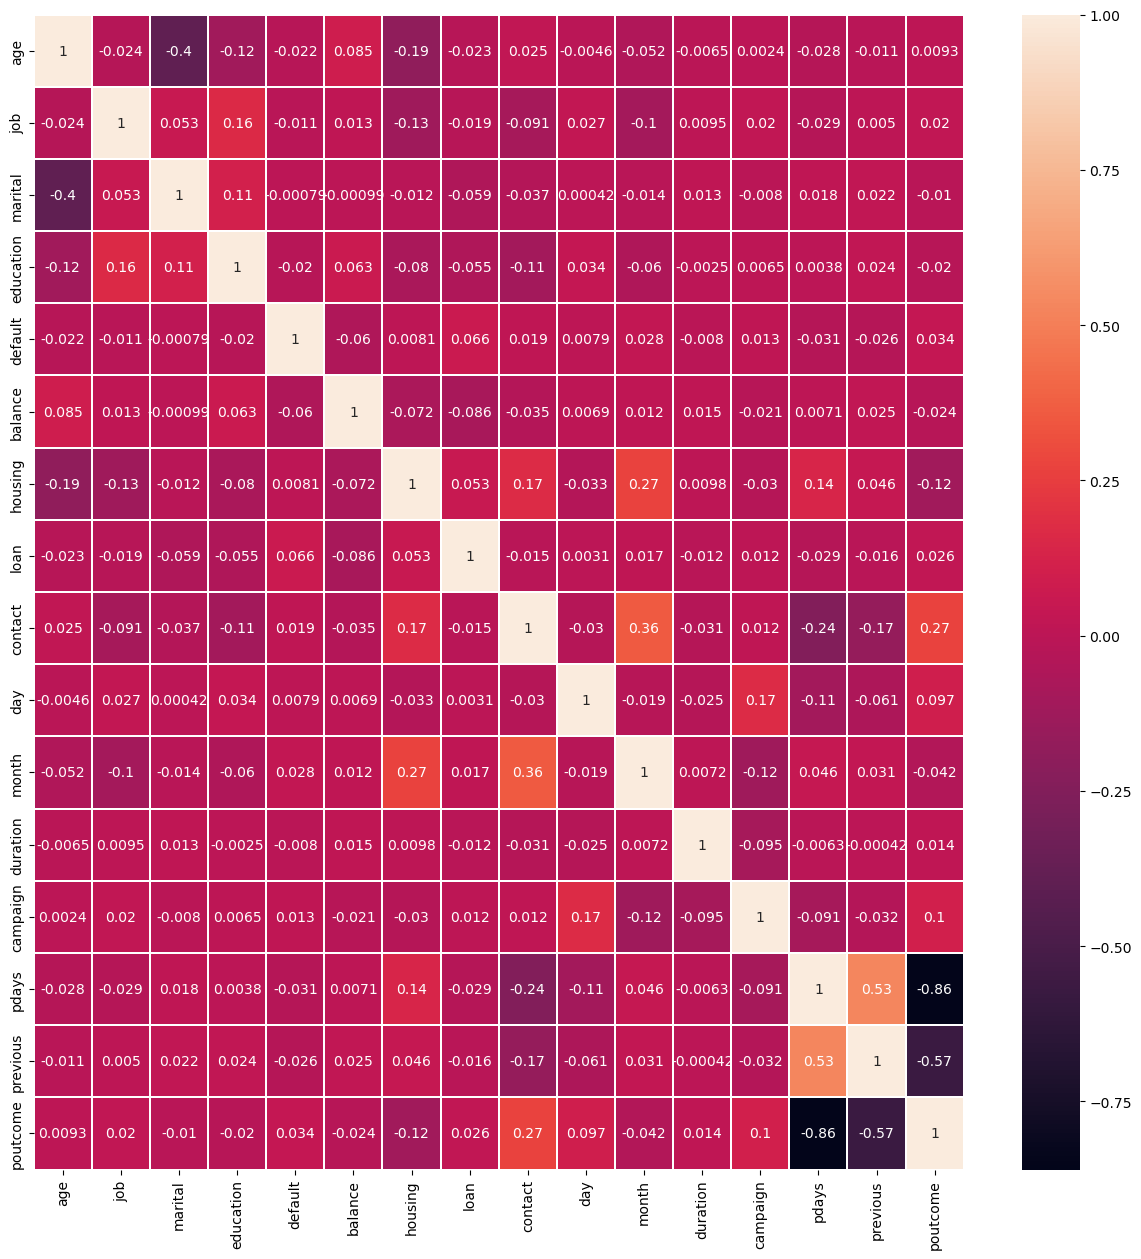

In [48]:
#visualizing correlation values using heatmap
plt.figure(figsize=(15,15))
sns.heatmap(cor,annot=True,linewidths=0.1)

In [49]:
#we observe multicollineraity between columns
#few columns are negatively correlated with each other
#Few columns are positively correlated with each other


In [50]:
#As balance and educationa are correalted to each other dropping balance column as it less helpful for prediction than education
df.drop('balance',axis=1,inplace=True)

#also day ,month ,default columns are highly correlted to each other
#dropping day column as it is not much helpful for prediction
df.drop('day',axis=1,inplace=True)

In [51]:
x=df.iloc[:,:]

In [52]:
x

,age,job,marital,education,default,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome
0,32,7,1,1,0,1,0,0,8,20,6,-1,0,3
1,78,5,0,0,0,0,0,1,5,372,1,-1,0,3
2,31,6,2,2,0,1,0,2,8,676,1,-1,0,3
3,57,7,2,0,0,1,0,1,8,65,2,-1,0,3
4,45,1,0,1,0,0,1,2,5,111,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,4,1,2,0,0,0,0,1,148,4,-1,0,3
13560,54,1,1,0,0,1,0,2,6,158,1,-1,0,3
13561,35,5,1,0,0,1,0,0,4,136,1,-1,0,3
13562,29,0,2,1,0,0,0,0,9,208,2,91,3,2


In [53]:
#Checking vIF values for collinearity between columns
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vi=pd.DataFrame()
vi['values']=[vif(x.values,i) for i in range(len(x.columns)) ]
vi['columns']=x.columns

vi

,values,columns
0,11.862071,age
1,2.839469,job
2,4.663865,marital
3,3.718019,education
4,1.024464,default
5,2.530982,housing
6,1.197109,loan
7,1.947656,contact
8,5.150623,month
9,2.002803,duration


In [54]:
#dropping pdays and poutcome column as they are highly collinear to other columns
x.drop('pdays',axis=1,inplace=True)
x.drop('poutcome',axis=1,inplace=True)

In [55]:
#Checking again for collinearity
vi=pd.DataFrame()
vi['values']=[vif(x.values,i) for i in range(len(x.columns)) ]
vi['columns']=x.columns

vi

,values,columns
0,6.567897,age
1,2.786119,job
2,3.884550,marital
3,3.601819,education
4,1.023356,default
5,2.393751,housing
6,1.187938,loan
7,1.826176,contact
8,5.011664,month
9,1.971033,duration


In [56]:
#Droppinng month column as it negatively correlated to target variable
x.drop('month',axis=1,inplace=True)

In [57]:
import joblib
model=joblib.load('train_term_deposit_prediction.pkl')
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [61]:
prediction=model.predict(x)
prediction

array([1, 1, 1, ..., 1, 1, 1])